In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, r2_score

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

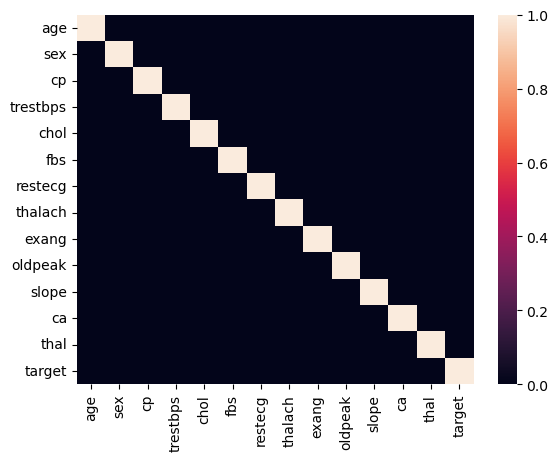

In [5]:
sns.heatmap(df.corr().apply(lambda x: (abs(x)>=0.70).astype(int)))
plt.show()

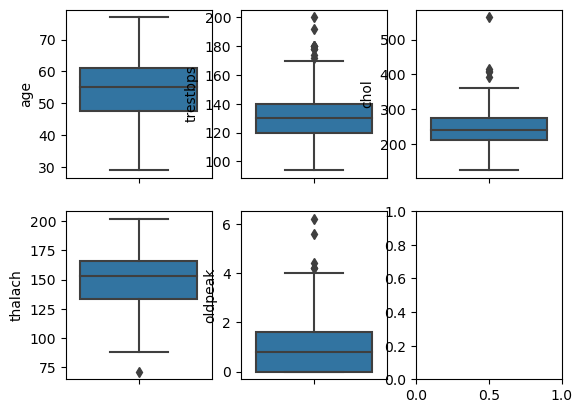

In [6]:
f, axs = plt.subplots(2, 3)
p, q = 0, 0
for i in df[["age", "trestbps", "chol", "thalach", "oldpeak"]]:
    sns.boxplot(y=df[i], ax=axs[p][q])
    q += 1
    if q > 2: q, p = 0, p + 1

In [7]:
for i in df:
    display(pd.crosstab(index=df["target"], columns=df[i]))

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
target,,,,,,,,,,,,,,,,,,,,,
0,0,0,2,0,1,1,2,1,1,3,...,4,3,6,2,1,3,0,0,0,1
1,1,2,2,2,2,3,1,9,7,5,...,4,4,3,2,2,1,3,1,1,0


sex,0,1
target,,
0,24,114
1,72,93


cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


trestbps,94,100,101,102,104,105,106,108,110,112,...,160,164,165,170,172,174,178,180,192,200
target,,,,,,,,,,,,,,,,,,,,,
0,0,2,0,0,0,0,0,2,11,4,...,6,1,1,3,0,1,1,2,1,1
1,2,2,1,2,1,3,1,4,8,5,...,5,0,0,1,1,0,1,1,0,0


chol,126,131,141,149,157,160,164,166,167,168,...,341,342,353,354,360,394,407,409,417,564
target,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,1,0,0,1,1,1,0,...,1,0,1,0,0,0,1,1,0,0
1,1,0,1,1,1,1,0,0,0,1,...,0,1,0,1,1,1,0,0,1,1


fbs,0,1
target,,
0,116,22
1,142,23


restecg,0,1,2
target,,,
0,79,56,3
1,68,96,1


thalach,71,88,90,95,96,97,99,103,105,106,...,184,185,186,187,188,190,192,194,195,202
target,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,2,2,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,1,0,...,1,1,2,1,1,1,1,1,0,1


exang,0,1
target,,
0,62,76
1,142,23


oldpeak,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,3.2,3.4,3.5,3.6,3.8,4.0,4.2,4.4,5.6,6.2
target,,,,,,,,,,,,,,,,,,,,,
0,25,3,3,1,1,1,4,0,6,2,...,2,3,0,4,1,3,1,1,1,1
1,74,4,9,2,8,4,10,1,7,1,...,0,0,1,0,0,0,1,0,0,0


slope,0,1,2
target,,,
0,12,91,35
1,9,49,107


ca,0,1,2,3,4
target,,,,,
0,45,44,31,17,1
1,130,21,7,3,4


thal,0,1,2,3
target,,,,
0,1,12,36,89
1,1,6,130,28


target,0,1
target,,
0,138,0
1,0,165


In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], train_size=0.75)

log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(xtrain, ytrain)

LogisticRegression(max_iter=10000)

0.8026315789473685 0.8026315789473685


<AxesSubplot:>

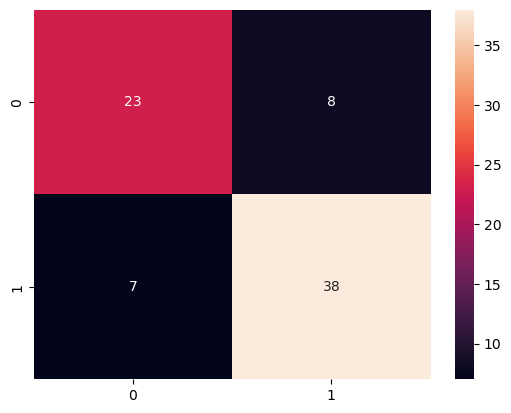

In [9]:
ypred = log_reg.predict(xtest)

confusion = confusion_matrix(ytest, ypred)

print(log_reg.score(xtest, ytest), (confusion[0, 0]+confusion[1, 1])/np.sum(confusion))
sns.heatmap(confusion, annot=True)